In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('./all_data.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Cleaning

#### Droped NaN values

In [3]:
df.dropna(how='all', inplace=True)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Remove text in "Order Date" Column

In [4]:
df = df[df['Order Date'].apply(lambda x: 'Or' not in x)]

#### Change (Quantity Ordered, Price Each) colmuns type to numeric

In [5]:
df.loc[:, 'Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df.loc[:, 'Price Each'] = pd.to_numeric(df['Price Each'])

### Add additional Columns

#### Add month column

In [6]:
# df['Month'] = pd.to_numeric(df['Order Date'].apply(lambda x: x[0:2]))
df['Month'] = pd.to_datetime(df['Order Date']).dt.month

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Add a city column

In [7]:
df['City'] = df['Purchase Address'].apply(lambda x: f"{x.split(',')[1]} ({x.split(',')[2][1:3]})")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)


#### Add a Sales column

In [8]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99


#### Add Hour and Minute column 

In [9]:
df.loc[:, 'Order Date'] = pd.to_datetime(df['Order Date'])

In [10]:
df['Hour'] = df['Order Date'].dt.hour
df['Minute'] = df['Order Date'].dt.minute

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,9,27


## Data Exploration!

#### Question 1: What was the best month for sales? How much was earned that month? 

In [11]:
sales = df.groupby('Month').sum()['Sales']

pd.DataFrame(sales.sort_values(ascending=False).head(1))

,Sales
Month,
12,4.613443e+06


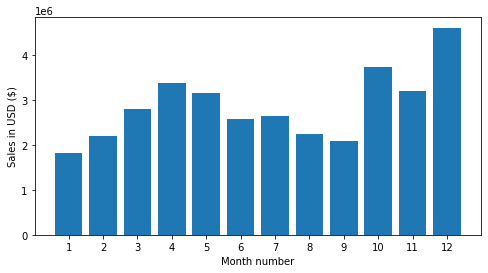

In [12]:
months = range(1, 13)
plt.figure(figsize=(8,4))
plt.bar(months, sales)
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

#### Question 2: What city sold the most product?

In [13]:
prod_sold = df.groupby('City').sum()
prod_sold.sort_values(by='Sales', ascending=False)

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
City,,,,,,
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06,643265,1319477
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06,427444,866638
New York City (NY),27932,4.635371e+06,175741,4.664317e+06,357696,733598
Boston (MA),22528,3.637410e+06,141112,3.661642e+06,288225,590442
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06,214264,442932
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06,214390,435155
Seattle (WA),16553,2.733296e+06,104941,2.747755e+06,213292,436368
Portland (OR),11303,1.860558e+06,70621,1.870732e+06,144421,295533
Austin (TX),11153,1.809874e+06,69829,1.819582e+06,141946,289060


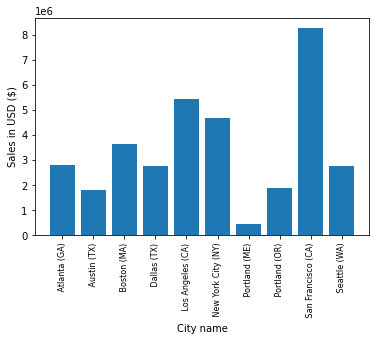

In [14]:
plt.bar(prod_sold.index, prod_sold['Sales'])
plt.xticks(prod_sold.index, rotation='vertical', size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City name')
plt.show()

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [15]:
by_time = df.groupby(['Hour']).sum()
by_time.sort_values(by='Sales', ascending=False).head()

,Quantity Ordered,Price Each,Month,Sales,Minute
Hour,,,,,
19,14470,2398588.31,91389,2412938.54,381042
12,14202,2299876.68,89161,2316821.34,368679
11,14005,2288855.18,87654,2300610.24,368952
20,13768,2268185.16,86375,2281716.24,354086
18,13802,2207696.93,86421,2219348.30,371688


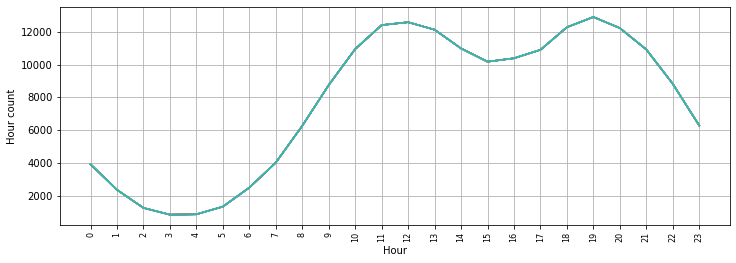

In [16]:
plt.figure(figsize=(12, 4))

plt.plot(by_time.index, df.groupby(['Hour']).count())
plt.grid()
plt.xticks(by_time.index, rotation='vertical', size=8)
plt.ylabel('Hour count')
plt.xlabel('Hour')
plt.show()

# My recommendation is slightly before 11am, 12am or 7pm

#### Question 4: What products are most often sold together?

In [17]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,9,27


In [18]:
df1 = df[df['Order ID'].duplicated(keep=False)]

df1['Grouped'] = df1.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df2 = df1[['Order ID', 'Grouped']].drop_duplicates()
# df2

<ipython-input-18-a56163c5f7a8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Grouped'] = df1.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [19]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### Question 5: What product sold the most? Why do you think it sold the most?

In [20]:
sold_most = df.groupby('Product').count()['Quantity Ordered']
pd.DataFrame(sold_most.sort_values(ascending=False))

,Quantity Ordered
Product,
USB-C Charging Cable,21903
Lightning Charging Cable,21658
AAA Batteries (4-pack),20641
AA Batteries (4-pack),20577
Wired Headphones,18882
Apple Airpods Headphones,15549
Bose SoundSport Headphones,13325
27in FHD Monitor,7507
iPhone,6842


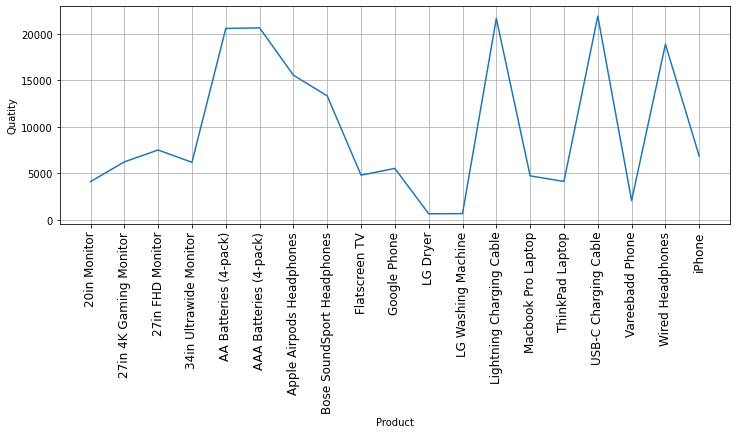

In [21]:
plt.figure(figsize=(12, 4))

plt.plot(sold_most.index, sold_most)
plt.grid()
plt.xticks(sold_most.index, rotation='vertical', size=12)
plt.ylabel('Quatity')
plt.xlabel('Product')
plt.show()

* These products are cheap
* It's a need of everyone, for example AAA battery almost dead in 1-2 month so every person need it mostly. On the other hand LG Dryer is expensive and nobody buy it many times.